In [90]:
import numpy as np
import pandas as pd 
import os
os.chdir("C:/Users/hp/Downloads/DecisionTree+RandomForest+EnsembleTechniques/Decision Tree + Random Forest + Ensemble Techniques")

In [91]:
df=pd.read_csv("admission.csv")

In [92]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [94]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Perform the Exploratory Data Anaysis 

In [95]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [96]:
df.shape

(500, 9)

In [97]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [98]:
df.describe(include='number')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Generate correlation matrix

<AxesSubplot:>

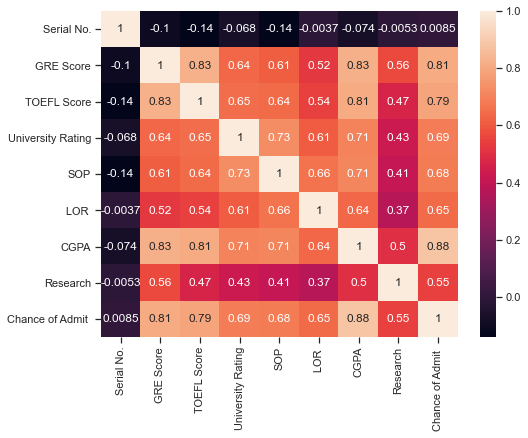

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[8,6])
sns.heatmap(df.corr(),annot=True)

## Generate the correlogram

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


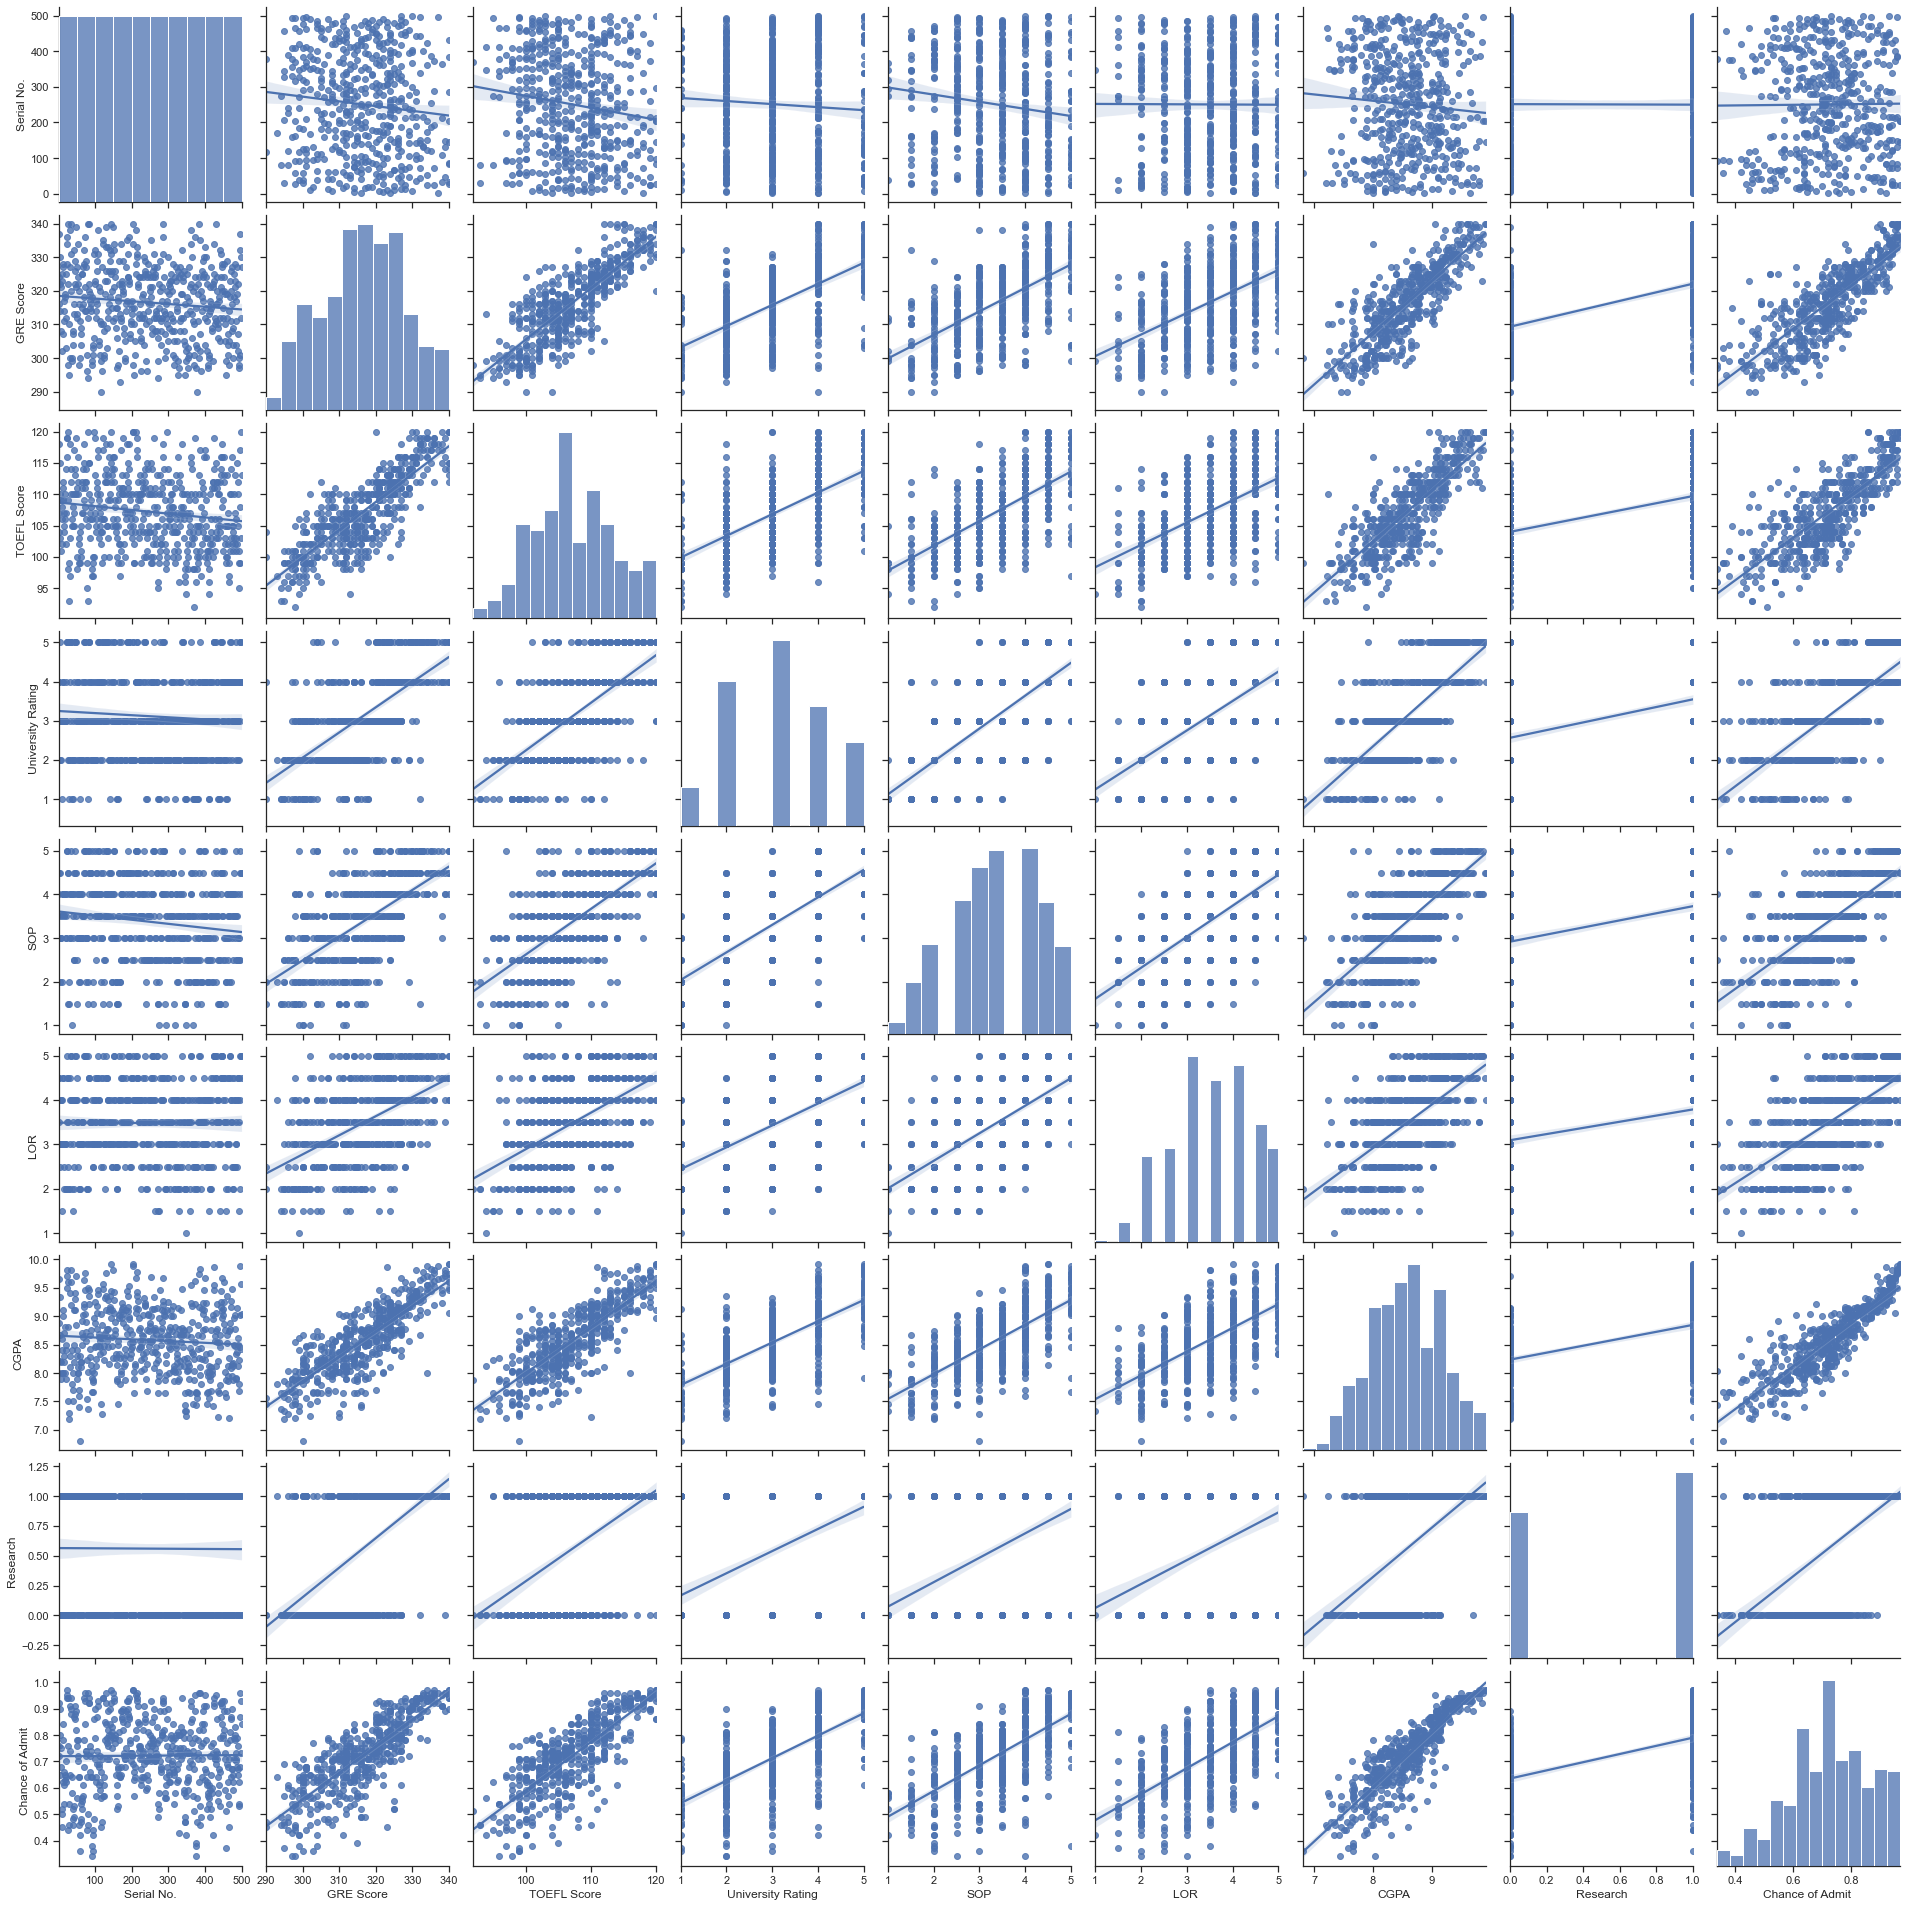

In [100]:
sns.set(style='ticks')
sns.pairplot(df, size=3, kind='reg')

## minimum and maximum values for GRE Score 


### 1. The minimun value of GRE SCore is 290.000000 
### 2. The maximum value of GRE Score is 340.000000

## Percentage of universities for each Rating

In [101]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [102]:
print('the percentage of universities for each rating is', (1-162/500)*100)

the percentage of universities for each rating is 67.6


## Convert the target variable “Chance of Admit” to categorical having values 0 and 1

In [103]:
df.loc[df['Chance of Admit '] < 0.80,'Chance of Admit '] = 0

In [104]:
df.loc[df['Chance of Admit '] >= 0.80,'Chance of Admit '] = 1

## split data

In [105]:
y=df['Chance of Admit ']

In [106]:
y[0:5]

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Chance of Admit , dtype: float64

In [107]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [108]:
x = df.drop(['Chance of Admit '], axis=1, inplace=True)

In [114]:
x=df

In [115]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [118]:
from sklearn import tree

In [119]:
x_train[0:2]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
369,301,98,1,2.0,3.0,8.03,1
364,313,102,3,3.5,4.0,8.90,1


In [120]:
y_train.shape

(400,)

In [121]:
x_train.shape

(400, 7)

## Decision Tree

In [122]:
dt = tree.DecisionTreeClassifier() 

In [123]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [124]:
y_pred = dt.predict(x_test)

In [125]:
y_pred[0:5]

array([0., 0., 0., 0., 0.])

In [126]:
y_test[0:5]

331    0.0
374    0.0
434    0.0
354    0.0
345    0.0
Name: Chance of Admit , dtype: float64

In [127]:
from sklearn import metrics

In [128]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

Accuracy 0.85


In [129]:
print('Precision', metrics.precision_score(y_test,y_pred))

Precision 0.75


In [130]:
print('Recall', metrics.recall_score(y_test,y_pred))

Recall 0.8181818181818182


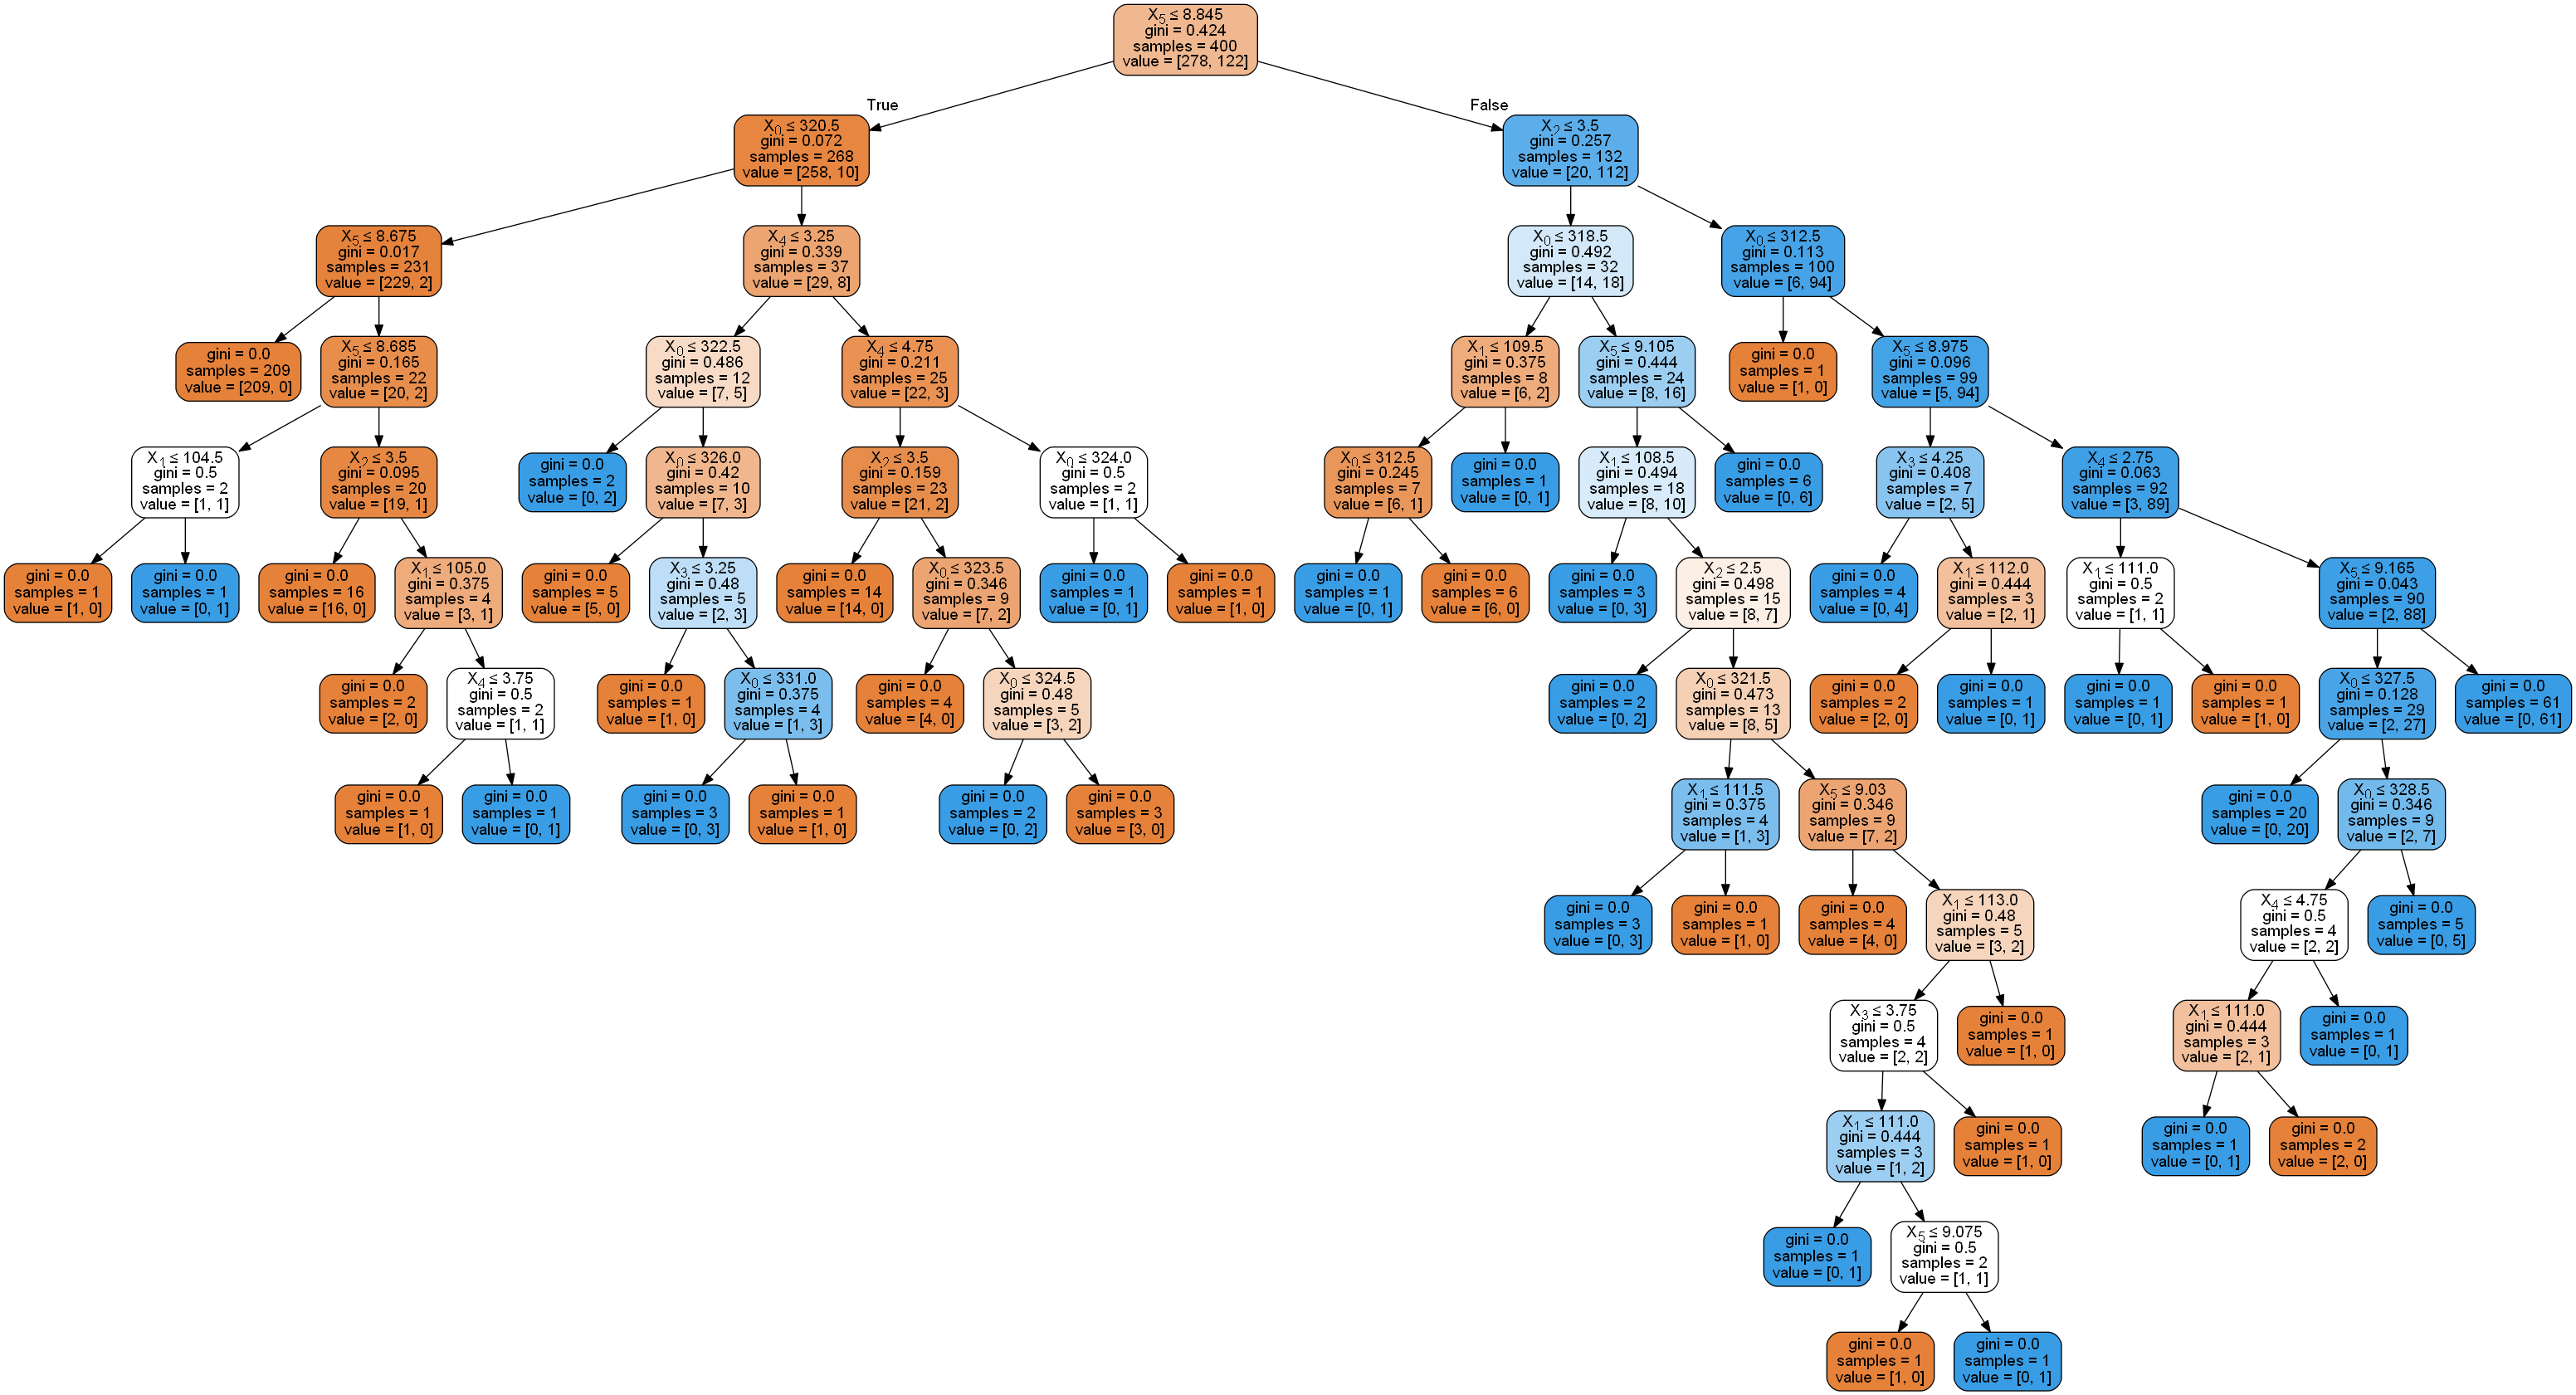

In [131]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

## Hyperparameter tunning

In [132]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [133]:
#create the function to genetate model report]
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('model with rank: {0}' .format(i))
            print('mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameter: {0}" .format(results['params'][candidate]))
            print("")

In [134]:
#specify parameter and distribution to sample from
param_dist = {"max_depth": [3, None],         ###[3,4,5,none uuse and try]
              "max_features": sp_randint(1,11),
              "min_samples_split": sp_randint(2,11),
              "criterion": ["gini","entropy"]}

In [135]:
#run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

In [136]:
start = time()
random_search.fit(x_train,y_train)
print("Randomized search too %.2f second for %d candidates" "parameter setting." %((time()-start), n_iter_search))
report(random_search.cv_results_)

Randomized search too 0.35 second for 10 candidatesparameter setting.
model with rank: 1
mean validation score:  0.918 (std: 0.013)
Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 10}

model with rank: 1
mean validation score:  0.918 (std: 0.026)
Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 10}

model with rank: 3
mean validation score:  0.910 (std: 0.015)
Parameter: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 5}

model with rank: 3
mean validation score:  0.910 (std: 0.044)
Parameter: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 7}



C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

In [137]:
#use a full grid of mention paramenter
param_grid = {"max_depth": [3, None],         ###[3,4,5,none uuse and try]
              "max_features": [1,3, 10],
              "min_samples_split": [2,3,10],
              "criterion": ["gini","entropy"]}

In [138]:
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)

In [139]:
start = time()
grid_search.fit(x_train,y_train)
print("GridSearchCV took %.2f second for %d candidate" "parameter setting." %(time()-start,\
                                                                              len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

GridSearchCV took 1.03 second for 36 candidateparameter setting.
model with rank: 1
mean validation score:  0.907 (std: 0.013)
Parameter: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 3}

model with rank: 1
mean validation score:  0.907 (std: 0.024)
Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 3}

model with rank: 3
mean validation score:  0.900 (std: 0.018)
Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 10}



C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

In [140]:
Parameter: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 3}


In [141]:
df_grid_search = tree.DecisionTreeClassifier(criterion='gini',max_depth= 3, max_features= 3, min_samples_split= 3)

In [142]:
df_grid_search.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_split=3)

In [143]:
y_pred_gs = df_grid_search.predict(x_test)

In [144]:
print('Accuracy', metrics.accuracy_score(y_test,y_pred_gs))
print('Pricission', metrics.precision_score(y_test,y_pred_gs))
print('Recall', metrics.recall_score(y_test,y_pred_gs))

Accuracy 0.91
Pricission 0.9615384615384616
Recall 0.7575757575757576


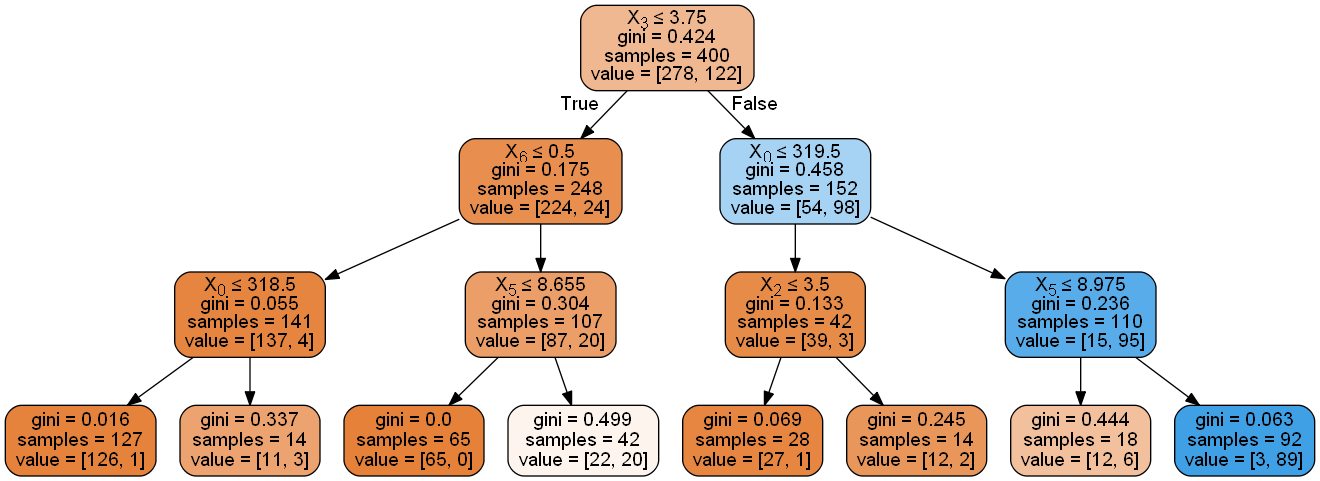

In [145]:
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(df_grid_search, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

## Build a Random Forest classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rf= RandomForestClassifier()

In [148]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [149]:
ypred = rf.predict(x_test)

In [150]:
print(ypred.shape)
print(ypred[0:5])

(100,)
[0. 0. 0. 0. 0.]


In [151]:
rf.feature_importances_

array([0.1912352 , 0.14728974, 0.08177075, 0.07928694, 0.04656299,
       0.42606245, 0.02779193])

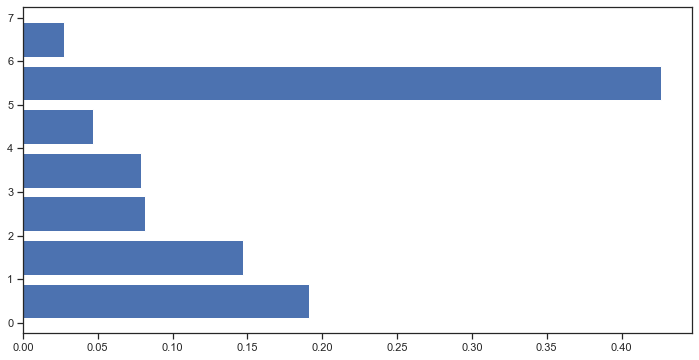

In [152]:
import matplotlib.pyplot as plt
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12,6))
#plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance, align='center')
plt.show()

In [153]:
from sklearn import metrics

In [154]:
print('Accuracy using RF', metrics.accuracy_score(y_test,ypred))
print('Pricission using RF', metrics.precision_score(y_test,ypred))
print('Recall using RF', metrics.recall_score(y_test,ypred))

Accuracy using RF 0.92
Pricission using RF 0.8787878787878788
Recall using RF 0.8787878787878788


##### Here student having high chnace to admit and student having low chance to admit are same.

## Ensemble Modelling techniques

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [156]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [157]:
gradient_booster.fit(x_train,y_train)

GradientBoostingClassifier()

In [158]:
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92        67
         1.0       0.81      0.91      0.86        33

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.89       100
weighted avg       0.91      0.90      0.90       100



## Compare all models

###### - In our dataset we have predict which Students having the “Chance of Admit” is high or low.
###### - In our Build model hyperparameter tunning model is gives best estimation of student having the chance of admit as compre to other                   model 
###### - Other model also give better estimator but Hyperparameter Tunning gives best estimator which student have chance of admit